<a id="table"></a>

<h1 style="background-color: #3498db;color:#ffffff;font-size: 2.5em;text-align: center;border-radius: 10px;padding: 10px;margin: 20px 0;box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);width: 90%;">
    Table of Contents
</h1>

<div style="background-color: #f0f8ff; /* very light blue color */
            border: 2px solid #3498db;
            padding: 15px; /* increased padding for a more spacious feel */
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); /* subtle box shadow */
            width: 90%;
            margin: 20px 0; /* added margin for better separation */">
            
​[1. Loading Librairies](#1)

[2. Reading files and basic exploration](#2)

[3. EDA](#3)

[4. Preprocessing & Feature Engineering](#4)

[5. Base Enemble Model (KFold + Optuna)](#5)

[6. Prediction (Inference)](#6)
    
</div>


<div style="background-color: #f0f8ff; /* very light blue color */
            border: 2px solid #3498db;
            padding: 15px; /* increased padding for a more spacious feel */
            box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1); /* subtle box shadow */
            width: 90%;
            margin: 20px 0; /* added margin for better separation */"> 
Project Description : 
TODO
</div>

<a id="1"></a>
<h1 style="background-color: #3498db;color:#ffffff;font-size: 2.5em;text-align: center;border-radius: 10px;padding: 10px;margin: 20px 0;box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);width: 90%;">
    1. Loading Librairies
</h1>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, Markdown
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder, FunctionTransformer, MinMaxScaler,LabelEncoder
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, ClassifierMixin

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import optuna


In [2]:
#formating 
RDM_COLOR = np.random.randint(0, 7)
def set_frame_style(df, caption="", font_size='20px', bg_color='#3498db', caption_color='brown'):
    """Helper function to set dataframe presentation style.
    
    Parameters:
    - df: Pandas DataFrame
    - caption: Caption for the DataFrame
    - font_size: Font size for the caption
    - bg_color: Background color for the DataFrame
    - caption_color: Color for the caption text
    
    Returns:
    - Styled Pandas DataFrame
    """
    random_list = ['Greys', 'Purples', 'Blues', 'BuPu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn']
    
    cmap = random_list[RDM_COLOR]
    
    styles = [
        {'selector': 'caption', 'props': [ ('font-size', font_size), ('font-weight', 'bold')]},
        {'selector': 'thead', 'props': [ ('color', '#3498db')]},
        {'selector': 'th', 'props': [ ('color', '#3498db')]},
        {'selector': 'td', 'props': [('border', '1px solid #ddd')]}
    ]
    
    return df.style.background_gradient(cmap=cmap).set_caption(caption).set_table_styles(styles)

def get_dataset_info(df):
    print(f" RangeIndex: {len(df)} entries, 0 to {len(df)}")
    print(f"Data columns (total {len(df.columns)} columns):")
    print(f"")
    print("""#\tColumn\t\t\tNon-Null Count\tDtype\tunique\n---\t------\t\t\t--------------\t-----\t-----\n""")
    a = "\t"
    max_l = len(max(df.columns, key=len))//8
    for i,item in enumerate(df.columns):
        tab_len = "\t" * (max_l - len(item)//8)
        print(f"{i}\t{item}\t\t{tab_len} {df[item].notnull().sum()} non-null\t{df[item].dtype}\t{len(df[item].unique())}")
    print(f"memory usage: {(df.memory_usage(index=True).sum()/ (1024.0 ** 2)):.2f} MB")


<a id="2"></a>
<h1 style="background-color: #3498db;color:#ffffff;font-size: 2.5em;text-align: center;border-radius: 10px;padding: 10px;margin: 20px 0;box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);width: 90%;">
2. Reading files and basic exploration</h1>

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
original_dataset = pd.read_csv("cirrhosis.csv")

<h5 style="font-size: 2em;width: 90%;">
    ○ Train
</h5>

In [4]:
get_dataset_info(train)


 RangeIndex: 7905 entries, 0 to 7905
Data columns (total 20 columns):

#	Column			Non-Null Count	Dtype	unique
---	------			--------------	-----	-----

0	id			 7905 non-null	int64	7905
1	N_Days			 7905 non-null	int64	461
2	Drug			 7905 non-null	object	2
3	Age			 7905 non-null	int64	391
4	Sex			 7905 non-null	object	2
5	Ascites			 7905 non-null	object	2
6	Hepatomegaly		 7905 non-null	object	2
7	Spiders			 7905 non-null	object	2
8	Edema			 7905 non-null	object	3
9	Bilirubin		 7905 non-null	float64	111
10	Cholesterol		 7905 non-null	float64	226
11	Albumin			 7905 non-null	float64	160
12	Copper			 7905 non-null	float64	171
13	Alk_Phos		 7905 non-null	float64	364
14	SGOT			 7905 non-null	float64	206
15	Tryglicerides		 7905 non-null	float64	154
16	Platelets		 7905 non-null	float64	227
17	Prothrombin		 7905 non-null	float64	49
18	Stage			 7905 non-null	float64	4
19	Status			 7905 non-null	object	3
memory usage: 1.21 MB


In [5]:
set_frame_style(train.head(),"Train dataset")


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.300000,316.000000,3.350000,172.000000,1601.000000,179.800000,63.000000,394.000000,9.700000,3.000000,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.900000,364.000000,3.540000,63.000000,1440.000000,134.850000,88.000000,361.000000,11.000000,3.000000,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.300000,299.000000,3.550000,131.000000,1029.000000,119.350000,50.000000,199.000000,11.700000,4.000000,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.600000,256.000000,3.500000,58.000000,1653.000000,71.300000,96.000000,269.000000,10.700000,3.000000,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.100000,346.000000,3.650000,63.000000,1181.000000,125.550000,96.000000,298.000000,10.600000,4.000000,C


In [6]:
set_frame_style(train.describe(),"Description of train dataset")

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,3952.000000,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,2282.121272,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,0.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1976.000000,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,3952.000000,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,5928.000000,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,7904.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


<h5 style="font-size: 2em;width: 90%;">
    ○ Test
</h5>

In [7]:
get_dataset_info(test)

 RangeIndex: 5271 entries, 0 to 5271
Data columns (total 19 columns):

#	Column			Non-Null Count	Dtype	unique
---	------			--------------	-----	-----

0	id			 5271 non-null	int64	5271
1	N_Days			 5271 non-null	int64	409
2	Drug			 5271 non-null	object	2
3	Age			 5271 non-null	int64	363
4	Sex			 5271 non-null	object	2
5	Ascites			 5271 non-null	object	2
6	Hepatomegaly		 5271 non-null	object	2
7	Spiders			 5271 non-null	object	2
8	Edema			 5271 non-null	object	3
9	Bilirubin		 5271 non-null	float64	108
10	Cholesterol		 5271 non-null	float64	222
11	Albumin			 5271 non-null	float64	154
12	Copper			 5271 non-null	float64	164
13	Alk_Phos		 5271 non-null	float64	362
14	SGOT			 5271 non-null	float64	195
15	Tryglicerides		 5271 non-null	float64	155
16	Platelets		 5271 non-null	float64	223
17	Prothrombin		 5271 non-null	float64	47
18	Stage			 5271 non-null	float64	4
memory usage: 0.76 MB


In [8]:
set_frame_style(test.head(),"Test dataset")


,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.200000,546.000000,3.370000,65.000000,1636.000000,151.900000,90.000000,430.000000,10.600000,2.000000
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.100000,660.000000,4.220000,94.000000,1257.000000,151.900000,155.000000,227.000000,10.000000,2.000000
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.000000,151.000000,2.960000,46.000000,961.000000,69.750000,101.000000,213.000000,13.000000,4.000000
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.600000,293.000000,3.850000,40.000000,554.000000,125.550000,56.000000,270.000000,10.600000,2.000000
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.400000,277.000000,2.970000,121.000000,1110.000000,125.000000,126.000000,221.000000,9.800000,1.000000


In [9]:
set_frame_style(test.describe(),"Description of test dataset")

,id,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000,5271.000000
mean,10540.000000,2038.696642,18497.756782,2.600389,352.486435,3.538071,84.701679,1811.233314,113.587526,115.286094,264.023715,10.632865,3.036995
std,1521.750965,1086.843490,3583.898801,3.852395,200.438989,0.354886,77.542064,1935.351492,48.964789,52.602780,87.584068,0.792711,0.856030
min,7905.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,9222.500000,1234.000000,15730.000000,0.700000,248.000000,3.350000,39.000000,823.000000,75.000000,84.000000,209.000000,10.000000,2.000000
50%,10540.000000,1882.000000,18806.000000,1.100000,299.000000,3.570000,65.000000,1142.000000,106.950000,104.000000,259.000000,10.600000,3.000000
75%,11857.500000,2692.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1838.500000,137.950000,138.000000,317.000000,11.000000,4.000000
max,13175.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,15.200000,4.000000


<h5 style="font-size: 2em;width: 90%;">
    ○ Original_dataset
</h5>

In [10]:
get_dataset_info(original_dataset)

 RangeIndex: 418 entries, 0 to 418
Data columns (total 20 columns):

#	Column			Non-Null Count	Dtype	unique
---	------			--------------	-----	-----

0	ID			 418 non-null	int64	418
1	N_Days			 418 non-null	int64	399
2	Status			 418 non-null	object	3
3	Drug			 312 non-null	object	3
4	Age			 418 non-null	int64	344
5	Sex			 418 non-null	object	2
6	Ascites			 312 non-null	object	3
7	Hepatomegaly		 312 non-null	object	3
8	Spiders			 312 non-null	object	3
9	Edema			 418 non-null	object	3
10	Bilirubin		 418 non-null	float64	98
11	Cholesterol		 284 non-null	float64	202
12	Albumin			 418 non-null	float64	154
13	Copper			 310 non-null	float64	159
14	Alk_Phos		 312 non-null	float64	296
15	SGOT			 312 non-null	float64	180
16	Tryglicerides		 282 non-null	float64	147
17	Platelets		 407 non-null	float64	244
18	Prothrombin		 416 non-null	float64	49
19	Stage			 412 non-null	float64	5
memory usage: 0.06 MB


In [11]:

set_frame_style(original_dataset.head(),"Orignial dataset")

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.500000,261.000000,2.600000,156.000000,1718.000000,137.950000,172.000000,190.000000,12.200000,4.000000
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.100000,302.000000,4.140000,54.000000,7394.800000,113.520000,88.000000,221.000000,10.600000,3.000000
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.400000,176.000000,3.480000,210.000000,516.000000,96.100000,55.000000,151.000000,12.000000,4.000000
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.800000,244.000000,2.540000,64.000000,6121.800000,60.630000,92.000000,183.000000,10.300000,4.000000
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.400000,279.000000,3.530000,143.000000,671.000000,113.150000,72.000000,136.000000,10.900000,3.000000


In [12]:
set_frame_style(original_dataset.describe(),"Description of the original dataset")

,ID,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,418.000000,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000,412.000000
mean,209.500000,1917.782297,18533.351675,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731,3.024272
std,120.810458,1104.672992,3815.845055,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000,0.882042
min,1.000000,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,105.250000,1092.750000,15644.500000,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000,2.000000
50%,209.500000,1730.000000,18628.000000,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000,3.000000
75%,313.750000,2613.500000,21272.500000,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000,4.000000
max,418.000000,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000,4.000000


<a id="3"></a>
<h1 style="background-color: #3498db;color:#ffffff;font-size: 2.5em;text-align: center;border-radius: 10px;padding: 10px;margin: 20px 0;box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);width: 90%;">
    3. EDA
</h1>

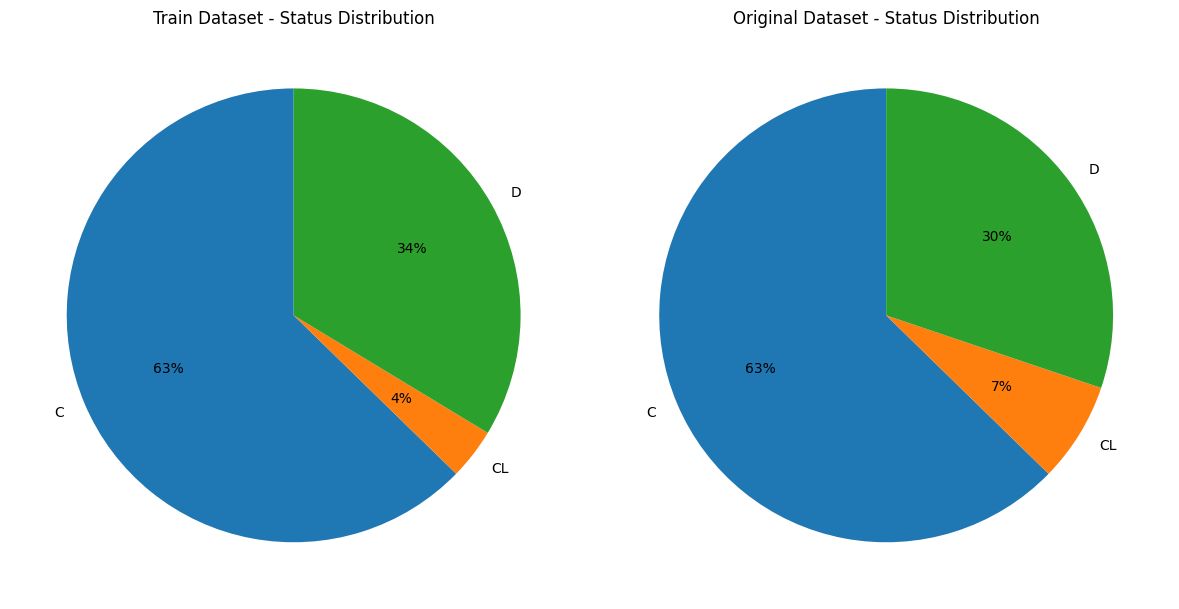

In [13]:
train_grouped = train.groupby('Status')['id'].sum()
original_grouped = original_dataset.groupby('Status')['ID'].sum()

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting for 'train'
axs[0].pie(train_grouped, labels=train_grouped.index, autopct='%1.0f%%', startangle=90)
axs[0].set_title('Train Dataset - Status Distribution')

# Plotting for 'original_dataset'
axs[1].pie(original_grouped, labels=original_grouped.index, autopct='%1.0f%%', startangle=90)
axs[1].set_title('Original Dataset - Status Distribution')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Triangle Correlation Heatmap')

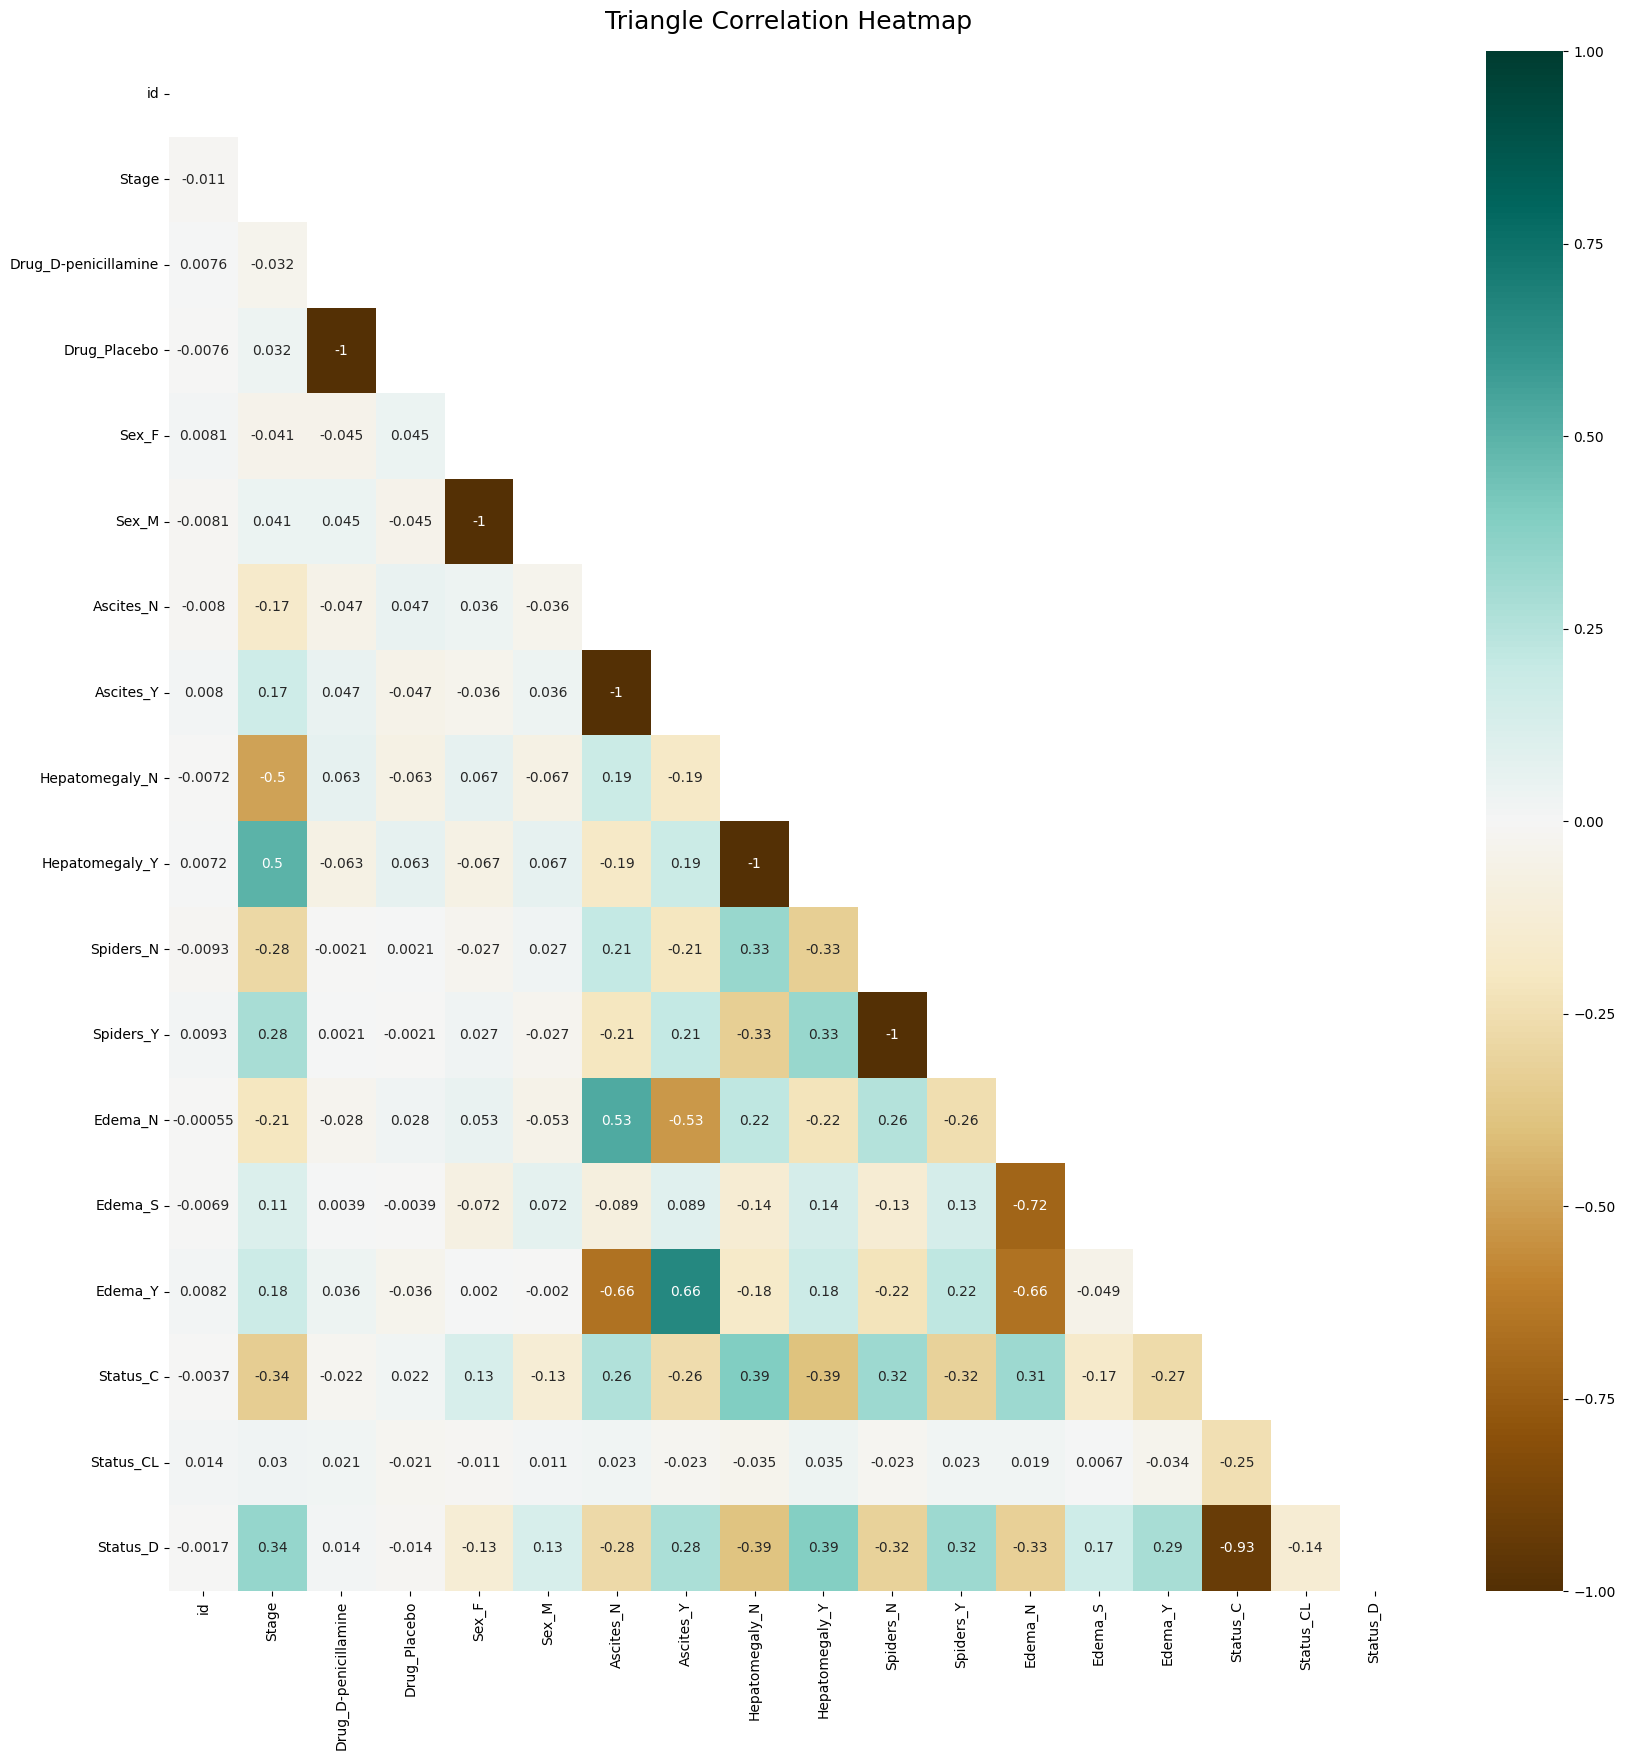

In [14]:
dummies = pd.get_dummies(train.drop(columns = ['N_Days',  'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin'], axis = 1))

correlation = dummies.corr()
mask = np.triu(np.ones_like(correlation, dtype=bool))
fig = plt.figure(figsize=(20,20))
heatmap = sns.heatmap(correlation, mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16)

<a id="4"></a>
<h1 style="background-color: #3498db;color:#ffffff;font-size: 2.5em;text-align: center;border-radius: 10px;padding: 10px;margin: 20px 0;box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);width: 90%;">
    4. Preprocessing & Feature Engineering
</h1>

In [15]:
cols = ['id', 'N_Days', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage', 'Status']

num_features = ['N_Days',  'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
cat_features = [ 'Drug', 'Sex', 'Ascites', 'Hepatomegaly','Spiders', 'Edema', 'Stage']

symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders', 'Edema_N', 'Edema_S', 'Edema_Y']
liver_columns = ['Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT']

original_dataset = original_dataset.rename(columns={"ID":"id"})




In [16]:
from sklearn.pipeline import FeatureUnion


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ("encoder", OneHotEncoder()),
])

numeric_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3)),
    ('scaler', MinMaxScaler())
])


preprocessor = ColumnTransformer(
    transformers=[
        
        ('cat', categorical_transformer, cat_features),
        ('num', numeric_transformer, num_features),
    ])


def add_features(df):
    # feature engineering from https://www.kaggle.com/code/ashishkumarak/ps3e26-liver-cirrhosis-survival-prediction#%F0%9F%92%BB-Feature-Engineering

    threshold_platelets = 150 
    df['thrombocytopenia'] = np.where(df['Platelets'] < threshold_platelets, 1, 0) 

    threshold_alk_phos_upper = 147  
    threshold_alk_phos_lower = 44 
    df['elevated_alk_phos'] = np.where((df['Alk_Phos'] > threshold_alk_phos_upper) | (df['Alk_Phos'] < threshold_alk_phos_lower), 1, 0)

    normal_copper_range = (62, 140)
    df['normal_copper'] = np.where((df['Copper'] >= normal_copper_range[0]) & (df['Copper'] <= normal_copper_range[1]), 1, 0)

    normal_albumin_range = (3.4, 5.4)
    df['normal_albumin'] = np.where((df['Albumin'] >= normal_albumin_range[0]) & (df['Albumin'] <= normal_albumin_range[1]), 1, 0)

    df['DiagnosisDays'] = df['Age'] - df['N_Days']


    df['Bilirubin_Albumin'] =df['Bilirubin'] *df['Albumin']

    symptom_columns = ['Ascites', 'Hepatomegaly', 'Spiders']
    df['Symptom_Score'] = df[symptom_columns].sum(axis=1)

    liver_columns = ['Bilirubin', 'Albumin', 'Alk_Phos', 'SGOT']
    df['Liver_Function_Index'] = df[liver_columns].mean(axis=1)

    df['Risk_Score'] = df['Bilirubin'] + df['Albumin'] - df['Alk_Phos']

    df['Diag_Year'] = (df['N_Days'] / 365).astype(int)
    df['Diag_Month'] = ((df['N_Days'] % 365) / 30).astype(int)


    return df

combined_features = Pipeline([
    ('add_features', FunctionTransformer(add_features, validate=False)),
    ('preprocessor', preprocessor),
    
])
combined_features


Pipeline(steps=[('add_features',
                 FunctionTransformer(func=<function add_features at 0x7ff5da42f240>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder())]),
                                                  ['Drug', 'Sex', 'Ascites',
                                                   'Hepatomegaly', 'Spiders',
                                                   'Edema', 'Stage']),
                                                 ('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=3)),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['N_Days', 'Age', 'Bilirubin',
                                                   'Cholesterol', 'Albumin',
                                                   'Copper', 'Alk_Phos', 'SGOT',
                                                   'Tryglicerides', 'Platelets',
                                                   'Prothrombin'])]))])

<a id="5"></a>
<h1 style="background-color: #3498db;color:#ffffff;font-size: 2.5em;text-align: center;border-radius: 10px;padding: 10px;margin: 20px 0;box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);width: 90%;">
    5. Base Enemble Model (KFold + Optuna)
</h1>

In [17]:
X= train.drop(columns = ['id', 'Status'], axis = 1)
X2 = original_dataset.drop(columns = ['id', 'Status'], axis = 1)
X = pd.concat([X,X2],ignore_index=True)

y = train["Status"]
y = pd.concat([train["Status"],original_dataset["Status"]],ignore_index=True)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [18]:

# # Define hyperparameters for XGBoost
# y = pd.DataFrame(y_encoded)



# # Define the ensemble model


# def objective(trial):
#   losses = []
#   skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#   for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
#       # Split the data into training and testing sets
#       X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#       y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
      
#       xgb_params = {
#         'objective': 'multi:softprob',
#         'eval_metric': 'mlogloss',
#         'max_depth': trial.suggest_int('max_depth', 3, 10),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10),
#         'random_state': 42
#       }

#       print(f"Fold {i} : ")

#       xgb_model = Pipeline([('preprocessor', preprocessor), ('classifier', XGBClassifier(**xgb_params))])
    
#       # Evaluate the ensemble model using cross-validation
#       xgb_model.fit(X_train,y_train)

#       y_proba = xgb_model.predict_proba(X_test)
#       # Calculate log loss (you can choose a different metric
      
      
#       loss = log_loss(y_test, y_proba)
      
#       print(f"xgb loss : {loss}")
#       losses.append(loss)
#   print(np.array(losses).mean())
#   return np.array(losses).mean()

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Print the best hyperparameters and the corresponding value of the objective function
# print('Best trial:')
# trial = study.best_trial
# print('Value: {}'.format(trial.value))
# print('Params: ')
# for key, value in trial.params.items():
#     print('    {}: {}'.format(key, value))

In [19]:
xgb_params = {
        'objective': 'multi:softprob',
        'eval_metric': 'mlogloss',
        'max_depth': 9,
        'min_child_weight': 7,
        'learning_rate': 0.04830133571010219,
        'n_estimators': 240,
        'subsample': 0.8660129295248991,
        'colsample_bytree': 0.30666383424449245,
        'reg_alpha': 1.6103163806254355,
        'reg_lambda': 0.006986151748792799,
        'random_state': 7
      }

In [20]:
# X= train.drop(columns = ['id', 'Status'], axis = 1)
# X2 = original_dataset.drop(columns = ['id', 'Status'], axis = 1)
# X = pd.concat([X,X2],ignore_index=True)

# y = train["Status"]
# y = pd.concat([train["Status"],original_dataset["Status"]],ignore_index=True)
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(y)
# y = pd.DataFrame(y_encoded)



# # Define the ensemble model


# def objective(trial):
#   losses = []
#   skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
#   for i, (train_idx, test_idx) in enumerate(skf.split(X, y)):
#       # Split the data into training and testing sets
#       X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
#       y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
      
#       lgb_params = {
#         'objective': 'multiclass',
#         'metric': 'multi_logloss',
#         'max_depth': trial.suggest_int('max_depth', 3, 15),
#         'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
#         'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
#         'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
#         'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
#         'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
#         'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
#         'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10),
#         'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10),
#         'random_state': 42
#         }

#       print(f"Fold {i} : ")

#       lgb_model = Pipeline([('preprocessor', preprocessor), ('classifier', LGBMClassifier(**lgb_params))])
    
#       # Evaluate the ensemble model using cross-validation
#       lgb_model.fit(X_train,y_train)

#       y_proba = lgb_model.predict_proba(X_test)
#       # Calculate log loss (you can choose a different metric
      
      
#       loss = log_loss(y_test, y_proba)
      
#       print(f"xgb loss : {loss}")
#       losses.append(loss)
#   print(np.array(losses).mean())
#   return np.array(losses).mean()

# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=50)

# # Print the best hyperparameters and the corresponding value of the objective function
# print('Best trial:')
# trial = study.best_trial
# print('Value: {}'.format(trial.value))
# print('Params: ')
# for key, value in trial.params.items():
#     print('    {}: {}'.format(key, value))

In [21]:
lgb_params = {
        'objective': 'multiclass',
        'metric': 'multi_logloss',
        'max_depth': 10,
        'min_child_samples': 14,
        'learning_rate': 0.018915441539900612,
        'n_estimators': 577,
        'min_child_weight': 9,
        'subsample': 0.6114946714098662,
        'colsample_bytree': 0.1607656371396136,
        'reg_alpha': 1.2483513341986796,
        'reg_lambda': 0.000267175573148859,
        'random_state': 3,
        }

In [22]:
from sklearn.ensemble import VotingClassifier

# Wrapper class for XGBoost
class XGBWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, xgb_params):
        self.xgb_params = xgb_params
        self.model = None

    def fit(self, X, y):
        self.model = Pipeline([('preprocessor', combined_features), ('classifier', XGBClassifier(**xgb_params))])
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)
    def predict_proba(self, X):
        return self.model.predict_proba(X)
# Wrapper class for LightGBM
class LGBMWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, lgbm_params):
        self.lgbm_params = lgbm_params
        self.model = None

    def fit(self, X, y):
        self.model = Pipeline([('preprocessor', combined_features), ('classifier', LGBMClassifier(**lgb_params))])
        self.model.fit(X, y)
        return self

    def predict(self, X):
        return self.model.predict(X)
    def predict_proba(self, X):
        return self.model.predict_proba(X)


# Create instances of wrapper classes
xgb_wrapper = XGBWrapper(xgb_params)
lgbm_wrapper = LGBMWrapper(lgb_params)

# Create a VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('xgb', xgb_wrapper),
        ('lgbm', lgbm_wrapper)
    ],
    voting='soft'  # Use 'hard' or 'soft' voting as per your requirement
)

voting_clf.fit(X, y)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000948 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1974
[LightGBM] [Info] Number of data points in the train set: 8323, number of used features: 28
[LightGBM] [Info] Start training from score -0.470941
[LightGBM] [Info] Start training from score -3.322996
[LightGBM] [Info] Start training from score -1.080160
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

VotingClassifier(estimators=[('xgb',
                              XGBWrapper(xgb_params={'colsample_bytree': 0.30666383424449245,
                                                     'eval_metric': 'mlogloss',
                                                     'learning_rate': 0.04830133571010219,
                                                     'max_depth': 9,
                                                     'min_child_weight': 7,
                                                     'n_estimators': 240,
                                                     'objective': 'multi:softprob',
                                                     'random_state': 7,
                                                     'reg_alpha': 1.6103163806254355,
                                                     'reg_lambda': 0.006986151748792799,
                                                     'subsample': 0.866012929524...
                              LGBMWrapper(lgbm_params={'colsample_bytree': 0.1607656371396136,
                                                       'learning_rate': 0.018915441539900612,
                                                       'max_depth': 10,
                                                       'metric': 'multi_logloss',
                                                       'min_child_samples': 14,
                                                       'min_child_weight': 9,
                                                       'n_estimators': 577,
                                                       'objective': 'multiclass',
                                                       'random_state': 3,
                                                       'reg_alpha': 1.2483513341986796,
                                                       'reg_lambda': 0.000267175573148859,
                                                       'subsample': 0.6114946714098662}))],
                 voting='soft')

<a id="6"></a>
<h1 style="background-color: #3498db;color:#ffffff;font-size: 2.5em;text-align: center;border-radius: 10px;padding: 10px;margin: 20px 0;box-shadow: 0 4px 6px rgba(0, 0, 0, 0.1);width: 90%;">
    6. Prediction (Inference)
</h1>

In [23]:
X_sub = test.drop(['id'],axis=1)
pred = voting_clf.predict_proba(X_sub)

with open("./submission.csv","+a") as file:
    file.write("id,Status_C,Status_CL,Status_D\n")
    for ind,val in enumerate(test['id']):
        file.write(f"{val},{pred[ind][0]},{pred[ind][1]},{pred[ind][2]}\n")

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
